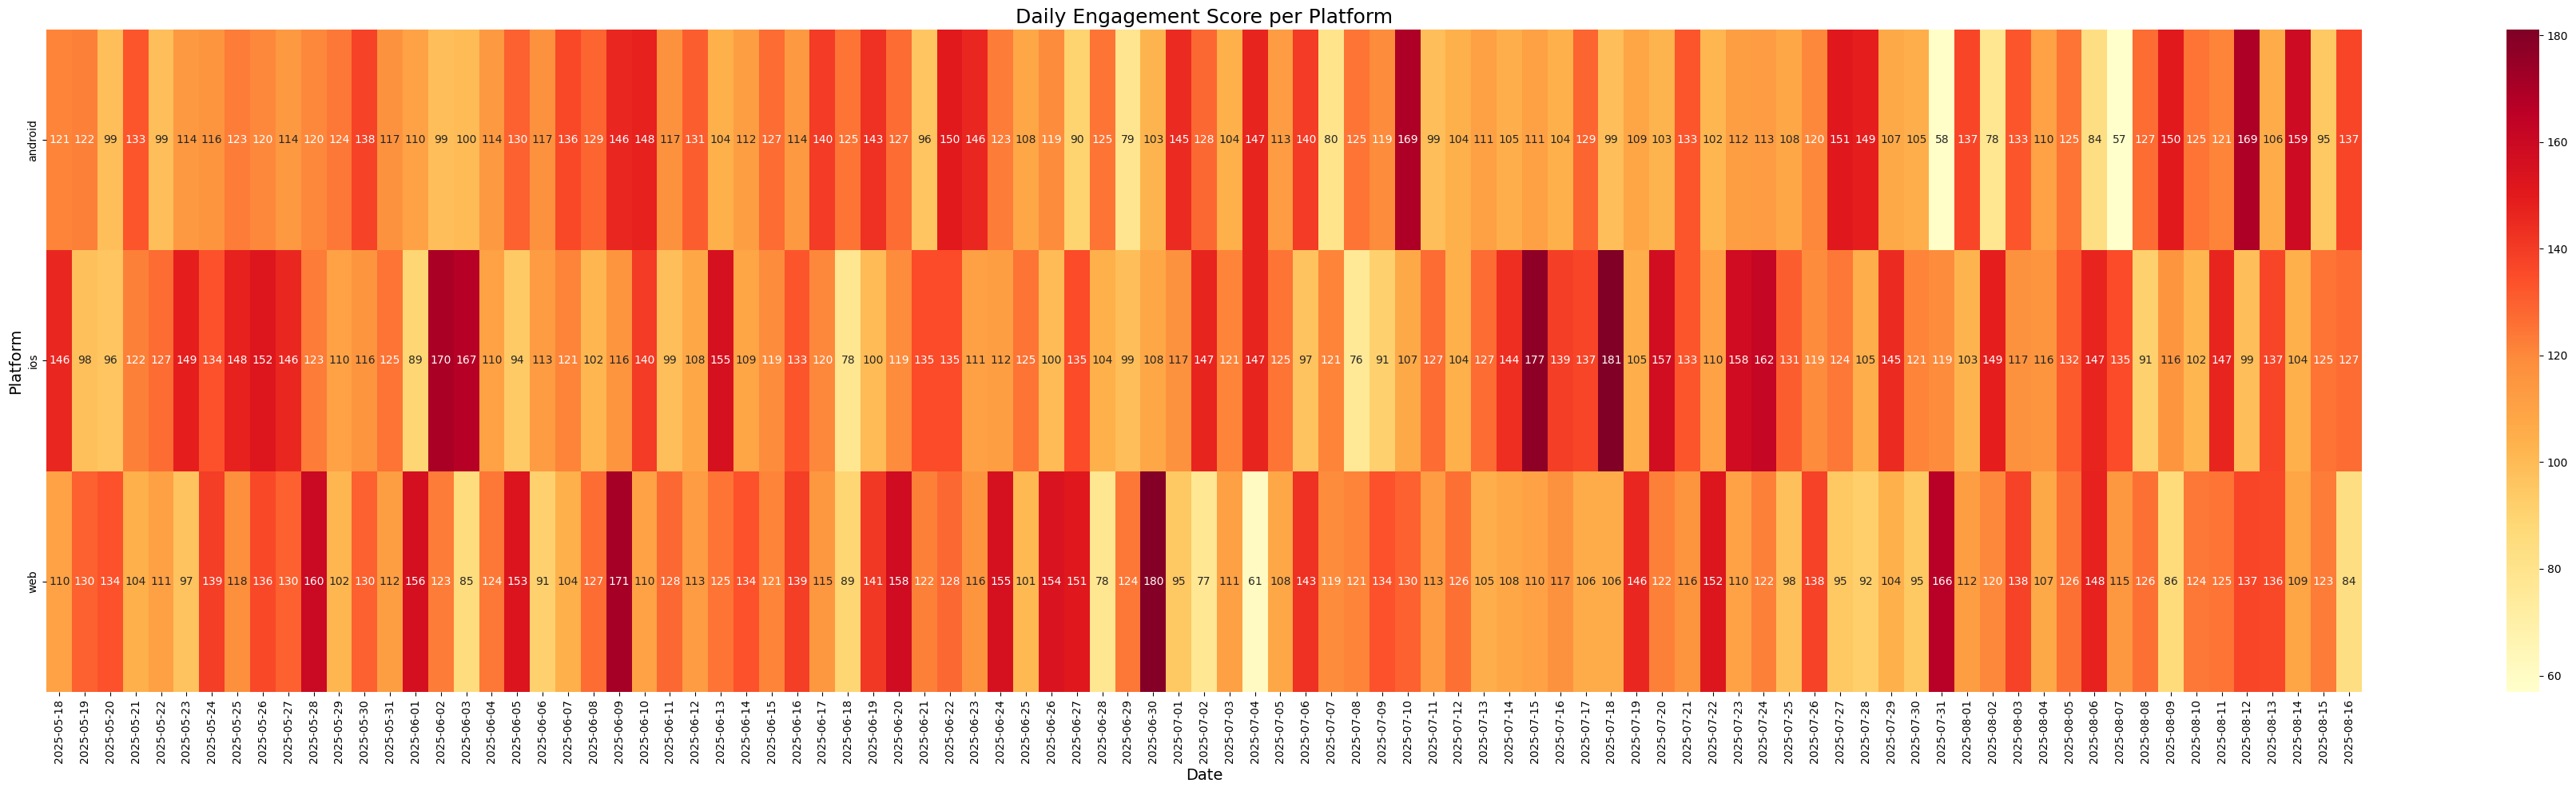

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random







def generate_data(num_months=3, num_users=100, events_per_day=200):
    start_date = datetime.now() - timedelta(days=num_months*30)
    end_date = datetime.now()
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    data = []
    



    platforms = ['web', 'ios', 'android']
    event_types = ['login', 'play_video', 'like', 'comment', 'logout']
    



    event_id_counter = 1
    for date in date_range:
        for _ in range(events_per_day):
            event_type = random.choice(event_types)
            watch_time = None
            video_duration = None
            video_id = None
            if event_type == 'play_video':
                video_duration = random.randint(60, 600)
                watch_time = random.randint(10, video_duration)
                video_id = f"vid_{random.randint(1, 50)}"
            data.append({'event_id': event_id_counter,'user_id': random.randint(1, num_users),
                'timestamp': (date + timedelta(seconds=random.randint(0, 86399))).strftime("%Y-%m-%d %H:%M:%S"),
                'platform': random.choice(platforms),'event_type': event_type,'video_id': video_id,
                'watch_time_sec': watch_time,'video_duration_sec': video_duration})
            event_id_counter += 1
    return pd.DataFrame(data)

df = generate_data()
df['timestamp'] = pd.to_datetime(df['timestamp'])

engagement_points = {
    'comment': 5,'like': 3,'play_video': 1,'login': 0,'logout': 0
}


df['engagement_score'] = df['event_type'].map(engagement_points)



df['date'] = df['timestamp'].dt.date
daily_engagement = (

    df.groupby(['date', 'platform'])['engagement_score']
    .sum()
    .reset_index()

)


pivot_df = daily_engagement.pivot(index='date', columns='platform', values='engagement_score').fillna(0)


plt.figure(figsize=(37, 10))  
sns.heatmap(pivot_df.T, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title("Daily Engagement Score per Platform", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Platform", fontsize=14)
plt.tight_layout()
plt.show()
